<h1> Projeto Wireless Power Transmission (WPT) </h1>

<h2>Objetivo:</h2>
Transmitir energia elétrica entre dois pontos pelo ar. (WIP)

<h3> Integrantes do grupo: </h3>  
Bernardo Cunha Capoferri  <br>
Guilherme Dantas Rameh  <br>
Henrique Martinelli Frezzatti  <br> 
Lívia Sayuri Makuta <br>

<h2> ETAPA 1 </h2>

<p style='text-align: justify;'> A WPT (Wireless Power Transfer) é uma das tecnologias mais comumente usadas para transferir energia pelo ar, que consiste em um acoplamento ressonante por campos próximos – ("near field ressonant coupling”, em inglês). Por fazer uso de duas bobinas, as quais serão uma transmissora e outra receptora, o fenômeno da transmissão de energia pelo ar é deveras similar ao funcionamento de um transformador convencional. Dessa forma,  pode-se utilizar o modelo elétrico do transformador para simular um circuito WPT.</p>
<br>
<br>
<div>  
<img src="circuitoMontado.jpg" align="center" width="300"/>     
</div>
<br>

<p style='text-align: justify;'> Contudo, há uma grande diferença entre um transformador com núcleo preenchido por material ferromagnético e outro preenchido por ar, isso porque a intensidade do campo magnético produzido pela bobina primária não será igual à intensidade do campo magnético no interior da bobina secundária, hipótese que foi usada ao construir o modelo do transformador. Entretando há uma solução.</p><br><br>
    
    
<p style='text-align: justify;'> Em um transformador convencional, a indutância mútua é calculada usando $M=\sqrt {L_1\cdot L_2}$, sendo que a definição de indutância mútua consiste na razão entre o fluxo magnético total em uma bobina e a corrente na outra. Assim, se apenas parte do fluxo magnético produzido por uma das bobinas chega à outra, pode-se considerar um “fator de acoplamento k”, de tal modo que $M=k\cdot \sqrt {L_1\cdot L_2}$. Esse fator de acoplamento varia entre 0 e 1, sendo 1 apenas quando há um núcleo de ferro entre as bobinas.</p> E mesmo sem sabermos a relação entre $k$ e a distância entre as bobinas, intuitivamente sabe-se que quanto maior a distância, menor será o $k$. </p>
<br>
<br>

<p style='text-align: justify;'> Com os avanços que ocorreram nas últimas duas décadas, técnicas foram criadas para se aumentar a eficiência de transmissão entre duas bobinas pelo ar: o acoplamento ressonante. E essa técnica considera que o circuito receptor deva ter uma frequência natural de oscilação que seja a mais próxima possível da frequência do campo magnético produzido pela fonte, que está conectada à bobina transmissora. Além disso, o campo magnético entre as bobinas aumenta em intensidade, o que permite uma transmissão mais eficiente a maiores distâncias. Logo, no projeto será modelado um acoplamento de bobinas ressonantes que não estarão tão próximas, de tal maneira que somente o ar estará presente entre elas </p>

<br>
<br>








<h3>1.1 - Elaboração do diagrama do modelo eletrodinâmico do circuito WPT </h3> <br>

<p style='text-align: justify;'> A primeira atividade do projeto consiste em especificar, por meio de um circuito, o modelo eletrodinâmico WPT usando abordagem fasorial. Para isso, o modelo eletrodinâmico do transformador será adaptado de modo a considerar o parâmetro 𝑘 e os capacitores $C1$ e $C2$, lembrando que $C1$ estará em série com a bobina primária, e $C2$ em paralelo com a secundária; no projeto, vamos considerar que as bobinas transmissora e receptora sejam iguais, ou seja, $L1$ = $L2$. Do mesmo modo, os capacitores também devem ser iguais ($C1$ = $C2$), de modo que a frequência de ressonância dos conjuntos $LC$ seja a mesma no primário e secundário.</p>
<br>
<br>

<p style='text-align: justify;'>Abaixo está o diagrama elétrico do modelo teórico que será utilizado no projeto: </p>

<div>
    <img src="projetoeletromag_circuitoCerto.png" align="center" width="600"/>
</div>

In [1]:
# Importando bibliotecas necessárias para o projeto.
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

<h4> Definindo as variáveis do projeto </h4>

Assim, inicializando a primeira atividade da etapa 1, abaixo foram definidas as resistências, as capacitâncias (iguais) e as indutâncias (iguais) com valores razoáveis para uma primeira análise. Além disso, também foi definido inicialmente um valor arbitrário para k, um valor arbitrário para a tensão da bobina primária e um valor igualmente arbitrário para a resistência de carga. Importante salientar que esses valores provavelmente serão diferentes após essa primeira análise.    

In [2]:
# Declarando variáveis do transformador:
k = 0.1
r1 = 0.1
r2 = 0.1
l1 = 100e-6
l2 = 100e-6
c1 = 100e-6
c2 = 100e-6

# Variaveis do sistema:
#V1 será v1(t) = (2/pi)*Vp*cos(wt)
#vp = 5
#v1 = rect((2/pi)*vp, 0)
v1 = rect(10, 0)
rc = 100

# Listas de variação:
listafreqr = np.linspace(1,3000, 10000)
lista_ks = np.linspace(0,0.5, 10)


<h3>1.2 - Código do modelo numérico </h3> </br>

<p style='text-align: justify;'>Para a segunda atividade da etapa 1, será escrito um código em Python que simule o
modelo esquematizado no item anterior. O código usará como parâmetros os valores das
indutâncias, capacitâncias e resistências das bobinas primária e secundária (neste momento serão utilizados valores quaisquer, mas que são razoáveis do ponto de vista físico). Além disso, foi utilizado como ponto de partida o código em Python do laboratório 2. </p>

<h4> Definindo as funções</h4>

<p> Dessa forma, para começar essa atividade, foram escritas abaixo as funções que serão utilizadas no projeto. A primeira calcula a frequência de ressonância a partir de um valor de indutância e capacitância, já que a fórmula dessa frequência pode ser definida como: </p>

<br>

\begin{equation}
Fr=\frac{1}{2{\pi}\sqrt{LC}}
\end{equation}

<br>

Outrossim, há também a função que calcula a corrente $i1$ e $i2$ das bobinas primária e secundária, repectivamente. Para essa função os valores de entrada são a tensão da bobina primária ($v1$), que é alternada, o valor da resistência de carga ($Rc$) que pode variar, os valores de frequência $f$ , $k$, $l1$ e $l2$ que também podem variar, o que será útil para as análises dos gráficos a serem plotados.



In [3]:
# Funções a seren usadas
def calcularFreqRessonancia(l,c):
    fr = 1/(2*pi*sqrt(l*c))
    return fr

def calcularTransformadores(v1, rc, freq, k=k, l1=l1, l2=l2):
    w = 2*pi*freq
    m = k*sqrt(l1*l2)
    # Calculando impedâncias:
    xl1 = 1j*w*l1
    xl2 = 1j*w*l2
    xc1 = 1/(1j*w*c1)
    xc2 = 1/(1j*w*c2)
    xm = 1j*w*m
    paralelo = (xc2*rc)/(xc2+rc)
    
    # v1 = i1*(xc1 + xr1 + xl1) -xm*i2
    # 0 = i2(xr2 + xl2 + (xc2*xrc/xc2+xrc)) - i1*xm
    z = np.array([[r1 + xc1 + xl1, -xm],[-xm, xl2 + r2 + paralelo]])
    v = np.array([v1,0])
    i = np.dot(linalg.inv(z),v)
    return i[0], i[1]

<h4> Encontrando a frequência de ressonância </h4>

<p> Para os valores de indutância e capacitância adotados e definidos anteriormente, o valor da frequência de ressonância calculada foi: </p>

In [4]:
fr = calcularFreqRessonancia(l1,c1)
print("Essa é a freq de ressonância", abs(fr))

Essa é a freq de ressonância 1591.5494309189535


<p> Além disso, os gráficos da tensão da bobina secundária por frequência e de potência da bobina secundária por frequência também foram plotados. Nota-se que em um valor próximo da frequência de ressonância há picos em ambos os gráficos </p>

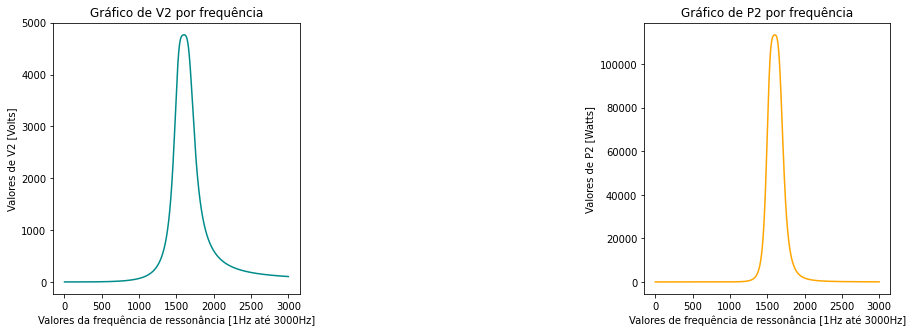

In [5]:
listaV2proj =[]
listaP2proj = []
for freq in (listafreqr):
    i1proj, i2proj = calcularTransformadores(v1,rc, freq)
    V2proj = i2proj*rc
    V2efproj = V2proj/sqrt(2)
    ief_conjugado = (i2proj.conjugate())/sqrt(2)
    P2proj = V2efproj*ief_conjugado
    listaV2proj.append(abs(V2proj))
    listaP2proj.append(abs(P2proj))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(listafreqr, listaV2proj, color="darkcyan")
plt.title("Gráfico de V2 por frequência")
plt.xlabel("Valores da frequência de ressonância [1Hz até 3000Hz]")
plt.ylabel("Valores de V2 [Volts]")
    
plt.subplot(1,3,3)
plt.plot(listafreqr, listaP2proj, color="orange")
plt.title("Gráfico de P2 por frequência")
plt.xlabel("Valores de frequência de ressonância [1Hz até 3000Hz]")
plt.ylabel("Valores de P2 [Watts]")
plt.show()

 <h3> 1.3 - Construção de gráficos de I1 e I2 em função da frequência </h3> </br>
 
 <p style='text-align: justify;'> Por sua vez, essa terceira atividade da etapa 1 consiste em fazer um gráfico
dos módulos das correntes $i1$ e $i2$ em função da frequência da fonte, para um $k$ (coeficiente de
acoplamento) qualquer inicialmente fixo. Por meio dessa atividade as seguintes perguntas serão respondidas: 
    <br><br>
     A frequência para a qual as correntes são máximas é coincidente com a frequência de ressonância que vocês obtiveram na atividade 1? 
    <br><br>
    O que acontece com os gráficos dos módulos das correntes quando se altera o $k$ do circuito? </p>



<h4> Gráfico de $i1$ e $i2$ para o $k$ fixo em 0.1</h4>



Esse é o i1 máximo: 63.80745673432529
Esse é o i2 máximo: 47.64462345360252
Essa é frequência máxima do i1 1512.0473047304731
Essa é frequência máxima do i2 1603.2260226022604


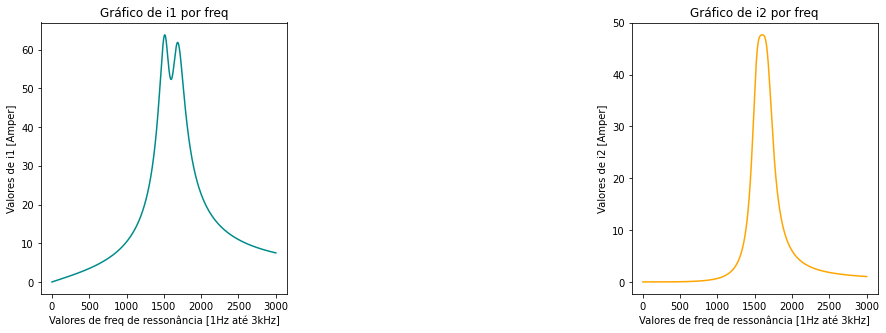

In [6]:
listai1 =[]
listai2 =[]
for freq in (listafreqr):    
    i1proj, i2proj = calcularTransformadores(v1,rc, freq)
    listai1.append(abs(i1proj))
    listai2.append(abs(i2proj))


i1Maximo = max(listai1)
i2Maximo = max(listai2)
print("Esse é o i1 máximo:", max(listai1))
print("Esse é o i2 máximo:", max(listai2))

indexi1 = listai1.index(i1Maximo)
indexi2 = listai2.index(i2Maximo)

freqmaxima1 = listafreqr[indexi1]
freqmaxima2 = listafreqr[indexi2]

print("Essa é frequência máxima do i1", freqmaxima1)
print("Essa é frequência máxima do i2", freqmaxima2)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(listafreqr, listai1, color="darkcyan")
plt.title("Gráfico de i1 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 3kHz]")
plt.ylabel("Valores de i1 [Amper]")
    
plt.subplot(1,3,3)
plt.plot(listafreqr, listai2, color="orange")
plt.title("Gráfico de i2 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 3kHz]")
plt.ylabel("Valores de i2 [Amper]")
plt.show()

   <p> Logo, para a primeira pergunta já é possível notar que quando as correntes são máximas, o valor da frequência não é a frequência de ressonância. Porém também percebe-se que esse gráfico apresenta dois picos. Os segundos picos talvez possam ser da frequência de ressonância, mas a corrente máximo nem sempre é obtida com o valor da frequência de ressonância. </p>

<h4> Gráfico de $i1$ e $i2$ para quando o $k$ varia entre 0 e 0.5 em um intervalo com dez pontos</h4>

<Figure size 1080x360 with 0 Axes>

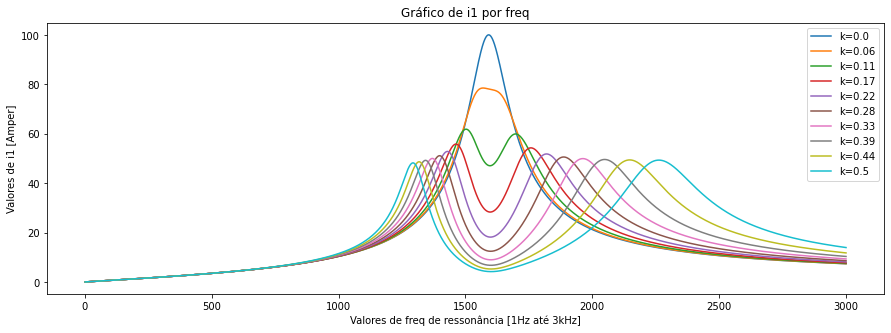

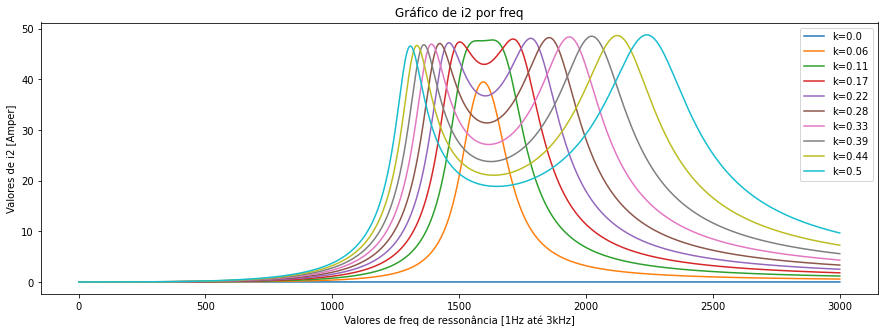

Esse é o i1 máximo: 99.99999662390819
Esse é o i2 máximo: 48.76846905615009
Essa é frequência para quando i1 é máximo 1591.5287528752876
Essa é frequência para quando i2 é máximo 2239.3775377537754


In [7]:
plt.figure(figsize=(15,5))

lista_ploti1 = []
lista_ploti2 = []

for k in lista_ks:
    listai1_ks =[]
    listai2_ks =[]
    for freq in (listafreqr):    
        i1proj, i2proj = calcularTransformadores(v1,rc,freq,k=k)
        listai1_ks.append(abs(i1proj))
        listai2_ks.append(abs(i2proj))
    
    lista_ploti1.append(listai1_ks)
    lista_ploti2.append(listai2_ks)
    


plt.figure(figsize=(15,5))
for i in range(len(lista_ploti1)):
    plot = lista_ploti1[i]
    plt.plot(listafreqr, plot, label=f"k={round(lista_ks[i], 2)}")
plt.title("Gráfico de i1 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 3kHz]")
plt.ylabel("Valores de i1 [Amper]")
plt.legend() 


plt.figure(figsize=(15,5))
for i in range(len(lista_ploti2)):
    plot = lista_ploti2[i]
    plt.plot(listafreqr, plot, label=f"k={round(lista_ks[i], 2)}")
plt.title("Gráfico de i2 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 3kHz]")
plt.ylabel("Valores de i2 [Amper]")
plt.legend() 

   
plt.show()

i1Maximo = 0
i2Maximo = 0
listaContemMaxI1 = 0
listaContemMaxI2 = 0
#print(len(lista_ploti1))
for i in range(len(lista_ploti1)):
    if max(lista_ploti1[i])> i1Maximo:
        i1Maximo = max(lista_ploti1[i])
        listaContemMaxI1 = i
    if max(lista_ploti2[i])> i2Maximo:
        i2Maximo = max(lista_ploti2[i])
        listaContemMaxI2 = i
        
print("Esse é o i1 máximo:", i1Maximo)
print("Esse é o i2 máximo:", i2Maximo)

indexi1 = lista_ploti1[listaContemMaxI1].index(i1Maximo)
indexi2 = lista_ploti2[listaContemMaxI2].index(i2Maximo)

freqmaxima1 = listafreqr[indexi1]
freqmaxima2 = listafreqr[indexi2]

print("Essa é frequência para quando i1 é máximo", freqmaxima1)
print("Essa é frequência para quando i2 é máximo", freqmaxima2)

<h3> 1.4 - Construção de gráficos das potências e da eficiência em função da frequência </h3>

<p style='text-align: justify;'> Por fim, a última atividade da Etapa 1 consiste em construir gráficos das potências reais de entrada e de saída em função da frequência. Além desses gráficos, um terceiro gráfico será construído que relacionará a eficiência (ou o ganho de potência) do seu sistema com frequência da fonte. Para todos esses gráficos os valores de $k$ também serão variáveis entre 0 e 0.5</p>

<h4> Gráfico da potência real de carga (saída) em função da frequência </h4>

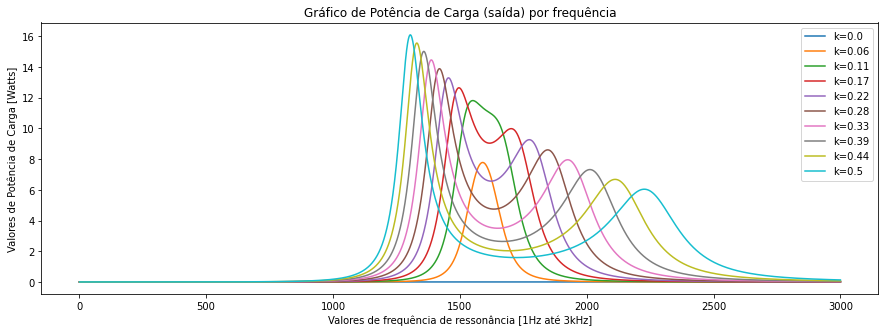

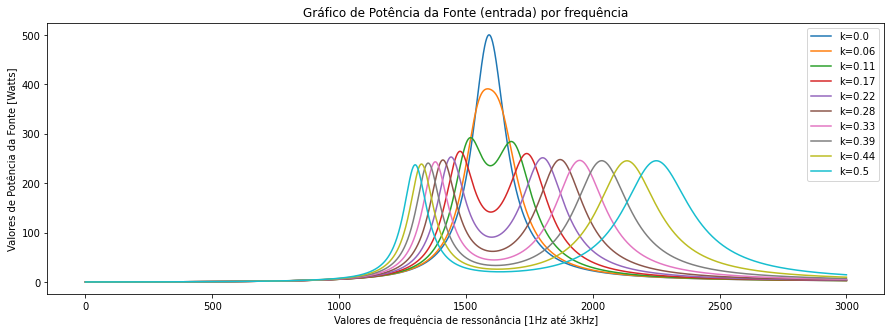

In [8]:
lista_plotpotcarga = []
lista_plotef = []
lista_plotpotfonte =[]

for k in lista_ks:
    listaPotCarga_ks =[]
    listaEf_ks = []
    listaPotFonte_ks =[]
    for freq in (listafreqr):
        w = 2*pi*freq
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        paralelo = (xc2*rc)/(xc2+rc) 
        i1proj, i2proj = calcularTransformadores(v1,rc,freq,k=k)
        v2 = i2proj*paralelo
        pot_carga = (v2/sqrt(2))*(i2proj.conjugate()/sqrt(2))
        pot_fonte = (v1/sqrt(2))*(i1proj.conjugate()/sqrt(2))
        eficiencia = (pot_carga.real/pot_fonte.real)
        
        listaPotCarga_ks.append(abs(pot_carga.real))
        listaPotFonte_ks.append(abs(pot_fonte.real))
        listaEf_ks.append(abs(eficiencia))
    
    lista_plotpotcarga.append(listaPotCarga_ks)
    lista_plotpotfonte.append(listaPotFonte_ks)
    lista_plotef.append(listaEf_ks)


plt.figure(figsize=(15,5))
for i in range(len(lista_plotpotcarga)):
    plot = lista_plotpotcarga[i]
    plt.plot(listafreqr, plot, label=f"k={round(lista_ks[i], 2)}")
plt.title("Gráfico de Potência de Carga (saída) por frequência")
plt.xlabel("Valores de frequência de ressonância [1Hz até 3kHz]")
plt.ylabel("Valores de Potência de Carga [Watts]")
plt.legend()

plt.figure(figsize=(15,5))
for i in range(len(lista_plotpotfonte)):
    plot = lista_plotpotfonte[i]
    plt.plot(listafreqr, plot, label=f"k={round(lista_ks[i], 2)}")
plt.title("Gráfico de Potência da Fonte (entrada) por frequência")
plt.xlabel("Valores de frequência de ressonância [1Hz até 3kHz]")
plt.ylabel("Valores de Potência da Fonte [Watts]")
plt.legend()

plt.show()

<h4> Gráfico de eficiência para diferentes frequências e diferentes  $k$</h4>

<p> Para calcular a eficiência foi feita a razão entre potência real da carga pela potência real da fonte. Com isso feito para diferentes valores de $k$ e de frequência, o seguinte gráfico pôde ser plotado: </p>

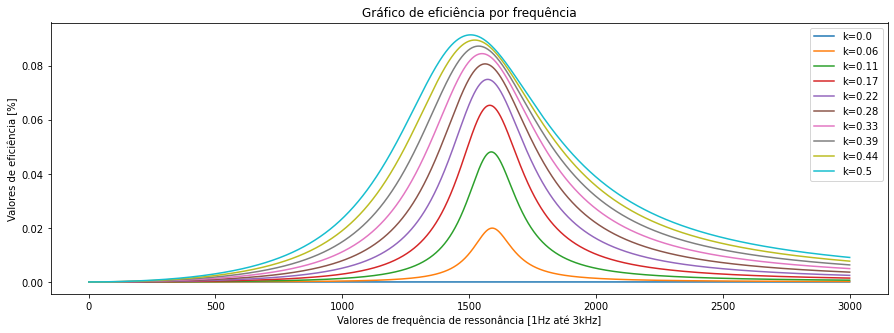

In [9]:
plt.figure(figsize=(15,5))
for i in range(len(lista_plotef)):
    plot = lista_plotef[i]
    plt.plot(listafreqr, plot, label=f"k={round(lista_ks[i], 2)}")
plt.title("Gráfico de eficiência por frequência")
plt.xlabel("Valores de frequência de ressonância [1Hz até 3kHz]")
plt.ylabel("Valores de eficiência [%]")
plt.legend() 
   
plt.show()

<h2> ETAPA 2 </h2>

<h3> Definindo os parâmetros a serem utilizados</h3>

<p>Para iniciar a etapa 2, primeiro foi calculada a indutância ideal para se ter a menor frequência de ressonância, já que como pôde ser observado nos gráficos plotados anteriormente, a eficiência foi maior para frequências de ressonância menores. E para a frequência de ressonância ser mais baixa, foi necessário definir um valor de indutância mais alto, processo esse que foi feito utilizando-se da seguinte calculadora encontrada na internet: <a> https://physika.info/site/aplicativos/javascript/inkalc.htm </a> </p>

<p> Assim, com a calculadora, o seguinte resultado foi obtido:
<img src="calculadora.png" align="center" width="600"/>


<p> Teoricamente, com a indutância definida e dada a limitação de capacitores, decidimos escolher um capacitor que não era tão baixo, mas que também não era o mais alto, e por isso foi escolhido o capacitor com o valor de 0,47 micro Farads. Ademais, como a transmissão se dará no ar, adotamos um valor bem baixo para $k$.</p>

<p> Porém, ao montar as bobinas e medir seus parâmetros com o medidor LCR, os seguintes valores foram encontrados: </p>

<img src="LCR_image.jpg" align="center" width="600" height="300"/>

<p>Logo, com os valores medidos na prática, os parâmetros do projeto foram redefinidos. Além disso, importante salientar que por conta pelo fato de o gerador de sinais não ter potência suficiente para alimentar a bobina primária do WPT, foi necessário trabalhar com um circuito denominado "meia ponte" (ou half bridge em inglês) que consegue isolar a excitação na frequência de ressonância (circuito de controle), proveniente do gerador de sinais, da alimentação da bobina primária (circuito
de potência). A imagem desse circuito encontra-se abaixo:</p>
  
<img src="mosfetes.png" align="center" width="600"/>

    
<p> E por trabalhar com uma tensão quadrada na entrada da da bobina primária, outra alteração foi feita na amplitude da função senoidal usada na simulação. Assim, a expressão da tensão v1(t) adotada para os cálculos foi a seguinte: </p>
    
\begin{equation}
V1(t)=\frac{2}{{\pi}}cos({\omega}t)
\end{equation}


<p>Sendo que nessa expressão, $Vp$ é a amplitude da onda quadrada (alimentação dos MOSFETs). E, importante salientar que para os cálculos abaixo essa tensão de pico adotada foi de 5V. Porém durante o experimento também fomos alternando a tensão para conseguir o maior valor de potência transmitida possível. </p>
        
<p>Assim, com todos esses valores foram calculadas a tensão na bobina secundária, a maior potência transmitida em função da resistência de carga e sua eficiência. </p>

O valor da frequência de ressonância do circuito é:  (8421.014332754317+0j)


Text(0, 0.5, 'Valor da potência em Watts')

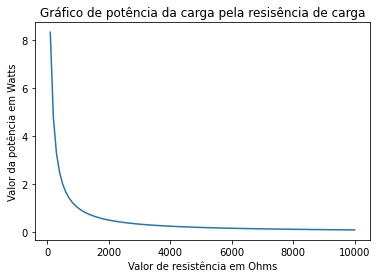

In [10]:
# Redefinindo os parâmetros iniciais do projeto:
rc_lista = np.linspace(100,10000, 100)
k_lista = np.linspace(0,0.6, 10)

l1 = 760e-6 #0,76 mH ou 760 microHenry
l2 = l1
c1 = 0.47e-6
c2 = c1
r1 = 168e-3
r2 = r1
k = 0.21


# Variaveis do sistema
vp = 15
v1 = rect((2/pi)*vp, 0)

fr = calcularFreqRessonancia(l1, c1)
w = 2*pi*fr
xc1 = 1/(1j*w*c1)
xc2 = 1/(1j*w*c2)

print("O valor da frequência de ressonância do circuito é: ", fr)

listaPotCarga =[]
listaEf = []
listaPotFonte =[]

maior_potencia = 0
rc_ideal = 0
k_ideal = 0
v2_carga = 0
i2_ideal = 0

for rc in (rc_lista):
    paralelo_carga = (xc2*rc)/(xc2+rc)
    i1, i2 = calcularTransformadores(v1, rc, fr, k=k, l1=l1, l2=l2)
    v2 = i2*paralelo_carga
    Pot_Carga = (v2/sqrt(2))**2/rc
    Pot_Fonte = (v1/sqrt(2))*(i1.conjugate()/sqrt(2))
    Eficiencia = (Pot_Carga.real/Pot_Fonte.real)

    if abs(Pot_Carga) > maior_potencia:
        maior_potencia = abs(Pot_Carga)
        rc_ideal = rc
        k_ideal = k
        v2_carga = v2
        i2_ideal = abs(i2)
        i1_ideal = abs(i1)

    listaPotCarga.append(abs(Pot_Carga))
    listaPotFonte.append(abs(Pot_Fonte))
    listaEf.append(Eficiencia)


plt.plot(rc_lista, listaPotCarga)
plt.title("Gráfico de potência da carga pela resisência de carga")
plt.xlabel("Valor de resistência em Ohms")
plt.ylabel("Valor da potência em Watts")


<h3> Conclusão </h3>

<p>Com o modelo utilizando os valores obtidos nas medições, os valores dos parâmetros para a melhor eficiência e potência transmitida são:</p>

In [11]:
print(f"{round(maior_potencia,3)}W é a maior potência que conseguimos transmitir para tensão de pico igual à {vp}V\n")
print(f"Essa é a resistência ideal em Ohms para alcançar essa potência: {rc_ideal}\n")
print(f"{round(abs(v2_carga), 2)} será a tensão na bobina secundária em Volts com a resistência de carga igual à {rc_ideal}\n")
print(f"Este é o k que foi testado para diversos valores e que está relacionado com a distância de 33 cm : {k}\n")
print(f"Este será o i2 para a melhor eficiência: {round(i2_ideal,2)}A")


8.336W é a maior potência que conseguimos transmitir para tensão de pico igual à 15V

Essa é a resistência ideal em Ohms para alcançar essa potência: 100.0

40.83 será a tensão na bobina secundária em Volts com a resistência de carga igual à 100.0

Este é o k que foi testado para diversos valores e que está relacionado com a distância de 33 cm : 0.21

Este será o i2 para a melhor eficiência: 1.09A


<p>E para validar o modelo teórico, as medições feitas resultaram na seguinte tabela: </p>

<img src="tabela.png" align="center" width="650"/>


<p>Percebe-se que para as distâncias de 33cm os valores do modelo teórico foram bem próximos dos medidos. No modelo teórico, quando foi utilizado o valor de 5V de pico na entrada, o valor de potência calculado foi de aproximadamente 0,926W e o valor da tensão na bobina secundária foi de aproximadamente 13,61V. E no experimento, para o mesmo valor de pico para entrada, o valor de tensão medido foi de 13,45V e o valor de potência de 0,904 W.</p> <br>

<p> Já para quando a tensão de pico da entrada foi de 15V, os valores teóricos calculados foram de: 40,83V para a tensão na bobina secundária e 8,336 Watts de potência. E os valores medidos foram: 41V de tensão secundária e 8,405W para a potência transmitida.</p> <br>

<p>Assim, percebe-se que o modelo teórico foi razoável e coerente com a realidade.</p>